In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

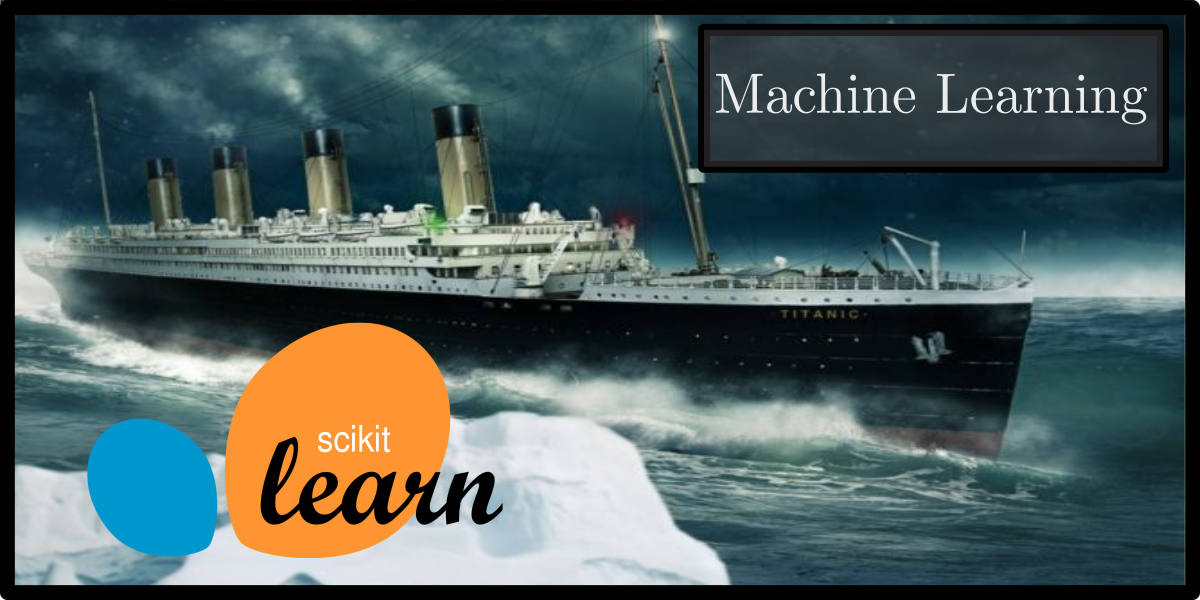

<h2>   
      <span>          
           Contents
    </span>
       
</h2>
<span>
    <ul>
        <li><a href='#intro'>1. Introduction</a></li>
        <ul>
            <li><a href='#background'>1.1 Background info</a></li>
            <li><a href='#data'>1.2 Dataset information</a></li>
        </ul>
        <li><a href='#libraries'>2. Python Libraries</a></li>
        <ul>
            <li><a href='#python'>2.1 Import Python Libraries</a></li>
         </ul>
        <li><a href='#understand'>3. Understanding the data</a></li>
        <ul>
            <li><a href='#import'>3.1 Importing the input csv</a></li>
            <li><a href='#inspect'>3.2 Overview the dataframes</a></li>
            <li><a href='#unwanted'>3.3 Delete Unwanted Columns</a></li>
            <li><a href='#nullcal'>3.4 Fixing the Null Values</a></li>
        </ul>
              <li><a href='#eda'>4. EDA (Exploratory Data Anslysis)</a></li>
        <ul>
            <li><a href='#survival'>4.1 Survival</a></li>
            <li><a href='#gender'>4.2 Gender</a></li>
            <li><a href='#age'>4.3 Age Group</a></li>
            <li><a href='#fare'>4.4 Fare Values</a></li>
            <li><a href='#ticketclass'>4.5 Ticket class</a></li>   
            <li><a href='#embark'>4.6 Embarked</a></li>            
        </ul>
              <li><a href='#eda'>5. Model Training</a></li>
        <ul>
            <li><a href='#logistic'>5.1 Logistic Regression</a></li>
            <li><a href='#random'>5.2 Random Forst Classifier</a></li>
            <li><a href='#suport'>5.3 Support vector machines</a></li>
            <li><a href='#knn'>5.4 KNN Classifier</a></li>
            <li><a href='#navis'>5.5 Naives Bayes</a></li>   
            <li><a href='#decision'>5.6 Decision Tree</a></li>    
            <li><a href='#decision'>5.7 ADABoost</a></li> 
            <li><a href='#decision'>5.8 Linear Discrimination</a></li> 
        </ul>
                <li><a href='#model_Ev'>6. Model Evaluation</a></li>
        <ul>
            <li><a href='#model_compar'>6.1 Model comparison</a></li>
        </ul>  
                <li><a href='#submis'>7. Submission</a></li>
        <ul>
            <li><a href='#model_subm'>7.1 Model submission</a></li>
                        


<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            1. Introduction :
            </span>   
    </font>
</h2>

<a id="background"></a>
<h3>   
          <span>
            1.1 Background info :
            </span>   
    
</h3>

<p>
    
 RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.    
    
    
source:  https://en.wikipedia.org/wiki/RMS_Titanic
 </p>

<a id="data"></a>
<h3>   
          <span>
            1.2 Dataset information :
            </span>   
    
</h3>

Goal: To predict the survival chances of the passengers  from the datasets.


<p>
    The items present in the datasets:

1.  PassengerId:   Id of the passenger who were available in the Titanic
2.  Survived:   0 for no survived and 1 for survived
3.  Pclass:  Ticket class: 1 - first class 2- second class
4. sex: Male/Female
5. sibsp: sibling/ spouses

and many more

    
</p>    



<a id="libraries"></a>
<h2>   
    <font  color='red'>
          <span>
            2. Python Libraries :
            </span>   
    </font>
</h2>


<a id="python"></a>
<h3>   
    <span>
            2.1 Import Python Libraries
     </span>   

</h3>


In [ ]:
import numpy as np   # for numerical calculation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id="understand"></a>
<h2>   
    <font  color='red'>
          <span>
            3. Understanding the data:
            </span>   
    </font>
</h2>


<a id="import"></a>
<h3>   
    <span>
            3.1 Importing the input csv
    </span>   
 
</h3>

In [ ]:
train_dir = pd.read_csv('/kaggle/input/titanic/train.csv')
test_dir = pd.read_csv('/kaggle/input/titanic/test.csv')
print("Training data: {}".format(train_dir.shape))
print("Testing data: {}".format(test_dir.shape))

There are total 891 Training data nad 418 Testing data. We will go for EDA for the training data

<a id="inspect"></a>
<h3>   
    <span>
            3.2 Overview the dataframes
    </span>   
 
</h3>

In [ ]:
train_dir.head(5)

The items present in the train directory:

1.  PassengerId:   Id of the passenger who were available in the Titanic
2.  Survived:   0 for no survived and 1 for survived
3.  Pclass:  Ticket class: 1 - first class 2- second class
4. sex: Male/Female
5. sibsp: sibling/ spouses

and many more


THe above features are really important to calculate if they survived or not.

In [ ]:
train_dir.columns

In [ ]:
train_dir.info()

In [ ]:
train_dir.isnull().any()

There are some missing values in cabins, Age and Embarked  in the datasets


We will check if the missing values can be handle or not in the datasets.


In [ ]:
train_dir.isnull().sum()

### Test data overview


In [ ]:
test_dir.head(2)

In [ ]:
train_dir.isnull().sum()

In the Test data, we have Age, Cabin and Embark as the missing information features

<a id="unwanted"></a>
<h3>   
    <span>
            3.3 Delete Unwanted Columns
    </span>   
 
</h3>

In [ ]:
train_dir.head(3)

PassengerId, Name  and Ticket will not play any role in Titanic survival chances. So, we will drop them

In [ ]:
updated_train_dir = train_dir.drop(['Ticket', 'PassengerId', 'Name','Cabin'], axis = 1)
updated_train_dir.head(3)

In [ ]:
updated_test_dir = test_dir.drop(['Ticket', 'PassengerId', 'Name','Cabin'], axis = 1)
updated_test_dir.head(3)

<a id="nullcal"></a>
<h3>   
    <span>
            3.4 Fixing the Null Values
    </span>   
 
</h3>

1.  #### Age 

In [ ]:
Missing_age = 100 * updated_train_dir['Age'].isnull().sum() / updated_train_dir['Age'].shape[0]

print("Age missing value: {}".format(Missing_age))

We will check the median of the Age Values

The diagram is rightly skewed. So, we can replace the Missing values with the median values

In [ ]:
print("Median value of Age is {}".format(updated_train_dir['Age'].median()))
updated_train_dir['Age'].fillna(updated_train_dir['Age'].median(), inplace=True)

In [ ]:
updated_train_dir['Age'].isnull().any()

There are no missing values in the Age columns. We will afterwards group all the age to get the better ideas.


Now, let focus on the other values of missing information

In [ ]:
updated_test_dir['Age'].fillna(updated_test_dir['Age'].median(), inplace=True)
updated_test_dir['Age'].isnull().any()

There are no missing data in the Test information

In [ ]:
# Other missing values
updated_train_dir.isnull().any()

Remaining values is Embarked for missing information


#### Embarked Missing info

In [ ]:
updated_train_dir['Embarked'].value_counts()

C = Cherbourg, Q = Queenstown, S = Southampton

Majority of the people embarked from Southamtpon port as compared to the other ports. So, we will replace the missing value with the S port.

Above all are the port information where the passengers embarked. Let calculate the missing values

In [ ]:
Missing_embarked = 100 * updated_train_dir['Embarked'].isnull().sum() / updated_train_dir['Embarked'].shape[0]
print("Missing embakred info: {}".format(Missing_embarked))

 It is very less value. So we will replace the missing value with the most embarked port i.e: S

In [ ]:
updated_train_dir['Embarked'].fillna('S', inplace=True)
updated_train_dir.isnull().any()

We fixed all the missing information available in the dataset.

In [ ]:
# in the test data
updated_test_dir['Embarked'].value_counts()


In [ ]:
updated_test_dir["Embarked"].fillna(updated_test_dir['Embarked'].value_counts().idxmax(), inplace=True)
updated_test_dir.isnull().any()

<a id="eda"></a>
<h2>   
    <span>
            4. EDA (Exploratory Data Analysis)
    </span>   
 
</h2>

<a id="eda"></a>
<h3>   
    <span>
            4.1 Survival
    </span>   
 
</h3>

In [ ]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Pie(labels=['Survived','Not Survived'],
                            values=updated_train_dir['Survived'].value_counts(),
                            textinfo = 'label + percent')])
fig.show()

In [ ]:
# Let calculate the number of survived and not survived values
total_survived_notsurvived = updated_train_dir['Survived'].shape[0]
num_survived = updated_train_dir[updated_train_dir['Survived'] == 1].shape[0]
not_survived = updated_train_dir[updated_train_dir['Survived'] == 0].shape[0]

print("Survived: {}".format(100 * (num_survived / total_survived_notsurvived)))
print("Not Survived: {}".format(100 * (not_survived/total_survived_notsurvived)))

Around 38 % people survived in the Titanic disaster.

And 61 % people not survived, which is really not a good thing.

Let calculate, gender of the people who survived or not

<a id="gender"></a>
<h3>   
    <span>
            4.2 Gender
    </span>   
 
</h3>

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=updated_train_dir)

**Observation:**

Among not survived people , majority are male as compared to female. Let dive deeper in the dataset

In [ ]:
# Let take other columns to learn from the data

updated_train_dir.columns

<a id="age"></a>
<h3>   
    <span>
            4.3 Age Group
    </span>   
 
</h3>

In [ ]:
updated_train_dir['Age'].iplot(kind='hist',
                                      xTitle='Age', title='AGE PLOT'
                                    )

**Observations**:

In Titanic, Age are scattered in various groups. So, we will divide into many groups.

Let group them together into three gtroups:

1.  0 - 20 Age
2. 20 - 40 Age
3. 40 + Age

In [ ]:
def grouping_Age(x):
    if x in range(0, 21):
        return 1
    elif x in range(21, 41):
        return 2
    else:
        return 3
    
    
updated_train_dir['Age group']= updated_train_dir['Age'].apply(grouping_Age)

In [ ]:
updated_test_dir['Age group']= updated_test_dir['Age'].apply(grouping_Age)

In [ ]:
age_index = updated_train_dir['Age group'].value_counts().index
age_values = updated_train_dir['Age group'].value_counts()
fig = go.Figure(data=[go.Pie(labels=['Age: 0-20','Age: 21-41','Age: 41+'],
                            values=age_values,
                            textinfo = 'label + percent')])
fig.show() 

In [ ]:
updated_train_dir['Age group'].value_counts()

**Observations**

1.  Age: 0 - 21    = 171 people
2.  Age: 21 - 41   = 374 people
3.  Age: 41+       = 346 people

MAjority of the people in the Titanic were of more than 21+ Age.


In [ ]:
updated_train_dir.columns

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<a id="fare"></a>
<h3>   
    <span>
           4.4 Fare Values
    </span>   
 
</h3>

In [ ]:
plt.figure(figsize=(15,10))

figure = sns.kdeplot(updated_train_dir['Fare'][updated_train_dir.Survived == 1],
                    shade=True)
sns.kdeplot(updated_train_dir['Fare'][updated_train_dir.Survived == 0],
                 color="lightcoral",   shade=True)
plt.legend(['Survived', 'Died'])
plt.title("Survival v/s Died")
plt.xlim(-20,200)

figure.set(xlabel='Fare')
plt.show()

**Observations**

People who paid low fares are less likely to survive, which relates them to the Ticket class they purchased.

Low Fares == Low Ticket class == Less Survival chances

<a id="ticketclass"></a>
<h3>   
    <span>
           4.5 Ticket class
    </span>   
 
</h3>

In [ ]:
updated_train_dir['Pclass'].value_counts().iplot(kind='bar',
                                         bins='10',
                                        xTitle = 'Ticket class',
                                        yTitle='Num of Passenger', title='Ticket Class')

Observations

Number of passengers belong to Third class ticket as compared to the upper class.

SO, we believe that, people likely to book ticket that belongs to economic or third class

In [ ]:
sns.barplot('Pclass', 'Survived', data=updated_train_dir)
plt.show()

As expected. People who purchased FIrst class Ticket are safest and survived in the disaster.

<a id="embark"></a>
<h3>   
    <span>
           4.6 Embarked
    </span>   
 
</h3>

In [ ]:
sns.barplot('Embarked','Survived', data=updated_train_dir)
plt.show()

So, below are the observations till now

1.  PEople onboarded from  C(Cherbourg) survived more
2.  Female survived more as compared to Male
3.  More Fares = Higher TIcket class = More survival chances


<a id="eda"></a>
<h2>   
    <span>
           5. Model Training
    </span>   
 
</h2>

In [ ]:
updated_train_dir.head(3)

In [ ]:
# We need to convert Model into the integer based for the model training
# So we will convert 1 for Male and 0 for female


gender = {
    'male': 1,
    'female':0
}
updated_train_dir['Sex'] = updated_train_dir['Sex'].apply(lambda x: gender.get(x))
updated_train_dir.drop(['Age'], axis=1, inplace=True)


In [ ]:
updated_test_dir['Sex'] = updated_test_dir['Sex'].apply(lambda x: gender.get(x))


In [ ]:
updated_test_dir.drop(['Age'], axis=1, inplace=True)


In [ ]:
updated_train_dir.head(3)
# always take a copy of the data
train_Data = updated_train_dir
updated_train_dir.head(3)

In [ ]:
updated_train_dir.drop(['Fare'], axis=1, inplace=True)

In [ ]:
updated_test_dir.drop(['Fare'], axis=1, inplace=True)

In [ ]:
updated_train_dir.head(3)

In [ ]:
traindf = pd.get_dummies(updated_train_dir, columns = ["Embarked","Age group", "Pclass"],
                             prefix=["Em_type", "Age_group", "Pclass_"])

In [ ]:
testdf = pd.get_dummies(updated_test_dir, columns = ["Embarked","Age group", "Pclass"],
                             prefix=["Em_type", "Age_group", "Pclass_"])
testdf.head(2)


In [ ]:
traindf.head(2)

### Data is ready to train[](http://)

We will make the Survived columns as the features value. 

In [ ]:
train_y = traindf['Survived']
traindf.drop(['Survived'], axis=1,inplace=True)

In [ ]:
print("Training shape: {} and Testing shape: {}\n\
      Training Label:{}".format(traindf.shape,
                                testdf.shape,
                                train_y.shape))

In [ ]:
traindf.info()

We need to understand the problem we are facing and datasets type.

We want to predict the survival rate for the given test data. Along with that, we have certain titanic datasets information and Survived rate as 0 and 1.

This is the Regression Problem. And the examples of the Supervised learning. We will verify the Models with the kFOLD and Evaluates the accuracy.

* Logistic Regression
* KNN
* Support Vector Machines
* Random Forest
* Decision Tree
* Navives Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
traindf.head(3)

In [ ]:
train_y[:3]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(traindf,
                                                   train_y,
                                                test_size=0.3,
                                                   random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

<a id="logistic"></a>
<h3>   
    <span>
           5.1 Logistic Regression
    </span>   
 
</h3>

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(max_iter=10000)
LogisticRegression.fit(X_train, Y_train)

In [ ]:
predictions = LogisticRegression.predict(X_test)
predictions

In [ ]:
Linear_Reg_acc = accuracy_score(predictions, Y_test) * 100

<a id="random"></a>
<h3>   
    <span>
           5.2 Random Forst Classifier
    </span>   
 
</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(n_estimators = 700,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=1,
                                      min_samples_leaf=1,
                                      min_samples_split=10                                  
                                )

In [ ]:
model_random.fit(X_train, Y_train)
predictions_random = model_random.predict(X_test)

In [ ]:
Random_Forest_Acc = accuracy_score(predictions_random, Y_test) * 100
print("Random FOrest acc: {}".format(Random_Forest_Acc))

<a id="suport"></a>
<h3>   
    <span>
           5.3 Support vector machines
    </span>   
 
</h3>

In [ ]:
from sklearn.svm import SVC, LinearSVC

svc_model = SVC()

svc_model.fit(X_train, Y_train)
predictions_svc = svc_model.predict(X_test)


In [ ]:
SVC_acc = accuracy_score(predictions_svc, Y_test) * 100
print("SVC accuracy: {}".format(SVC_acc))

<a id="knn"></a>
<h3>   
    <span>
           5.4 KNN Classifier
    </span>   
 
</h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_model  = KNeighborsClassifier(n_neighbors = 4)
n_model.fit(X_train, Y_train)

In [ ]:
predictions_knn = n_model.predict(X_test)

In [ ]:
accuracy_score(predictions_knn, Y_test) * 100

In [ ]:
knn_data = {}
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    prediction_data = model.predict(X_test)
    knn_data[i] = accuracy_score(prediction_data, Y_test) * 100
    

In [ ]:
knn_data

In [ ]:
# max value of neighbors
data = max(knn_data, key=knn_data.get)
print(data)

In [ ]:
n_model  = KNeighborsClassifier(n_neighbors = 14)
n_model.fit(X_train, Y_train)
predictions_knn = n_model.predict(X_test)
knn_Ac = accuracy_score(predictions_knn, Y_test) * 100
print(knn_Ac)

In [ ]:
knn_acc = knn_data[14]
print("KNN accuracy: {}".format(knn_acc))

<a id="navis"></a>
<h3>   
    <span>
          5.5 Naives Bayes
    </span>   
 
</h3>


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()

model_naive.fit(X_train, Y_train)

prediction_naive = model_naive.predict(X_test)

In [ ]:
gaussian_acc = accuracy_score(prediction_naive, Y_test) * 100
print("Gaussian Acc: {}".format(gaussian_acc))

<a id="decision"></a>
<h3>   
    <span>
           5.6 Decision Tree
    </span>   
 
</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_data = {}
for i in range(2,40):
    tree_model = DecisionTreeClassifier(criterion='gini',
                                    min_samples_split=i,
                              max_features='auto',
                              min_samples_leaf=1)
    tree_model.fit(X_train, Y_train)
    tree_predict = tree_model.predict(X_test)
    tree_data[i]=accuracy_score(tree_predict, Y_test)
    

In [ ]:
tree_data

In [ ]:
# we will fetch the larger values
tree_val = max(tree_data, key=tree_data.get)
print(tree_val)

In [ ]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    min_samples_split=12,
                              max_features='auto',
                              min_samples_leaf=12)

In [ ]:
tree_model.fit(X_train, Y_train)
tree_predict = tree_model.predict(X_test)
tree_acc = accuracy_score(tree_predict, Y_test)
print("Tree accuarcy: {}".format(tree_acc))

<a id="adaboost"></a>
<h3>   
    <span>
           5.7 ADABoost
    </span>   
 
</h3>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
model_ada.fit(X_train, Y_train)

In [ ]:
prediction_add = model_ada.predict(X_test)
ada_accuracy = accuracy_score(prediction_add, Y_test) * 100
print('ada accuarcy: {}'.format(ada_accuracy))

<a id="logistic"></a>
<h3>   
    <span>
           5.8 Linear Discrimination
    </span>   
 
</h3>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_linear_d= LinearDiscriminantAnalysis()
model_linear_d.fit(X_train,Y_train)
prediction_lda=model_linear_d.predict(X_test)
LDA_Accuracy = accuracy_score(prediction_lda, Y_test)
print("Accuracy LDA: {}".format(LDA_Accuracy))

<a id="model_Ev"></a>
<h2>   
    <span color='red'>
           6. Model Evaluation
    </span>   
 
</h2>

<a id="model_compar"></a>
<h3>   
    <span>
          6.1 Model comparison
    </span>   
 
</h3>

In [ ]:
models = {
    'LinearDiscriminant':   [LDA_Accuracy, prediction_lda],
    'ADA': [ada_accuracy, prediction_add],
    'DecisionTreeClassifier':[tree_acc,tree_predict],
    'GaussianNB': [gaussian_acc,prediction_naive],
    'LinearSVC':[SVC_acc,predictions_svc],
    'RandomForestClassifier':[Random_Forest_Acc,predictions_random],
    'LogisticRegression':[Linear_Reg_acc,predictions]
}

In [ ]:
models_acc = {
    'LinearDiscriminant':   LDA_Accuracy,
    'ADA': ada_accuracy,
    'DecisionTreeClassifier':tree_acc,
    'GaussianNB': gaussian_acc,
    'LinearSVC':SVC_acc,
    'RandomForestClassifier':Random_Forest_Acc,
    'LogisticRegression':Linear_Reg_acc}

In [ ]:
max_acc = max(models_acc, key=models_acc.get)
print("MAx accuracy is : {}".format(max_acc))
print(models_acc[max_acc])

In [ ]:
# We will use LinearSVC model to predict the test datasets
pred_test = svc_model.predict(testdf)
pred_test

In [ ]:
len(pred_test)

<a id="submis"></a>
<h2>   
    <span>
           7. Submission
    </span>   
 
</h2>

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_dir["PassengerId"],
        "Survived": pred_test})

In [ ]:
submission

<a id="model_subm"></a>
<h3>   
    <span>
          7.1 Model submission
    </span>   
 
</h3>

In [ ]:
submission.to_csv("submission.csv",index=False)